In [1]:
import pandas as pd

In [2]:
import pathlib
pathlib.Path().resolve()

PosixPath('/Users/mustafamohammadi/Documents/Python Programming/Comp_8720_Advanced_AI/Final Project')

In [4]:
X = pd.read_csv('./Dataset/data.csv')
y = pd.read_csv('./Dataset/labels.csv')

In [15]:
print(X.shape)
print(y.shape)

(801, 20531)
(801, 1)


In [6]:
X = X.iloc[:, 1:]
y = y.iloc[:, 1:]

In [13]:
print(X.shape)
print(y.shape)
print(y)

(801, 20531)
(801, 1)
    Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
..    ...
796  BRCA
797  LUAD
798  COAD
799  PRAD
800  PRAD

[801 rows x 1 columns]


In [8]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [11]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0])
plt.show()

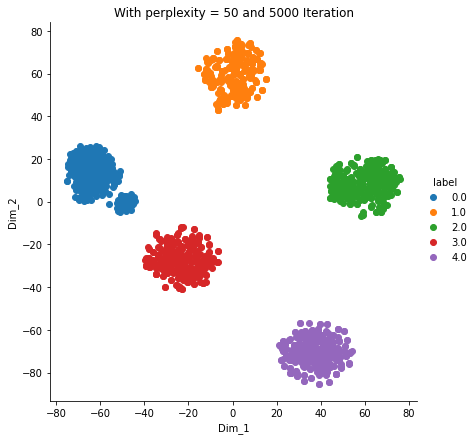

In [188]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(X) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50 and 5000 Iteration')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [17]:
print(X.shape)
print(y.shape)

(1500, 20531)
(1500, 1)


In [125]:
print(X.nunique())
print(y.nunique())

gene_0         115
gene_1        1469
gene_2        1492
gene_3        1499
gene_4        1498
              ... 
gene_20526    1499
gene_20527    1500
gene_20528    1499
gene_20529    1499
gene_20530     274
Length: 20531, dtype: int64
Class    5
dtype: int64


In [126]:
y.value_counts()

Class
BRCA     300
COAD     300
KIRC     300
LUAD     300
PRAD     300
dtype: int64

In [127]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(X.isin([0,0.0]).sum())

gene_0        1386
gene_1          31
gene_2           7
gene_3           0
gene_4           0
              ... 
gene_20526       0
gene_20527       0
gene_20528       0
gene_20529       0
gene_20530    1227
Length: 20531, dtype: int64


In [128]:
import matplotlib.pyplot as plt

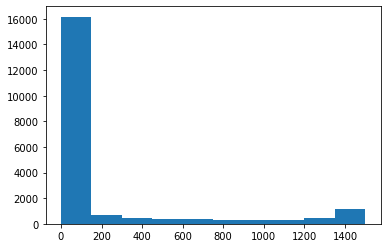

In [129]:
plt.hist(X.isin([0,0.0]).sum())
plt.show()

In [130]:
sample_reduction = X.isin([0,0.0]).sum()
print(sample_reduction)
print(type(sample_reduction))


gene_0        1386
gene_1          31
gene_2           7
gene_3           0
gene_4           0
              ... 
gene_20526       0
gene_20527       0
gene_20528       0
gene_20529       0
gene_20530    1227
Length: 20531, dtype: int64
<class 'pandas.core.series.Series'>


In [131]:
X1 = X.dropna()

In [132]:
X1.shape

(1500, 20531)

In [133]:
X1 = X1.drop(columns=X1.columns[(X1 == 0.0).sum()>500])

In [134]:
X1.shape

(1500, 17439)

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [136]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X1)

In [137]:
from sklearn.feature_selection import chi2

In [138]:
chi_scores = chi2(X_train_minmax,y)
print(chi_scores)

(array([13.68001336, 22.67941991, 42.82664581, ...,  2.51800471,
        5.10687933, 27.46868605]), array([8.38956177e-03, 1.46734249e-04, 1.12413449e-08, ...,
       6.41414698e-01, 2.76505764e-01, 1.59801697e-05]))


In [88]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 814 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=59d29f9ead95ccfc678b47666067c9a3b70cff110c278bf862145e947d70f382
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [89]:
from mrmr import mrmr_classif

In [139]:
print(X.shape)
print(X1.shape)
print(X_train_minmax.shape)
print(y.shape)

(1500, 20531)
(1500, 17439)
(1500, 17439)
(1500,)


In [95]:
# # use mrmr classification
# selected_features = mrmr_classif(X_train_minmax, y, K = 10)
# print(selected_features)

In [173]:
import random
l1 = []
for i in range(10):
  l1.append(random.randint(1, 15000))

print(l1)

[5289, 12403, 12219, 9755, 6428, 4384, 11851, 13837, 4010, 4586]


In [174]:
timepass = X_train_minmax[:,l1]
timepass.shape

(1500, 10)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timepass, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[45  1  0  8  0]
 [ 0 56  0  3  0]
 [ 2  0 67  0  0]
 [ 4  2  0 54  0]
 [ 0  0  3  0 55]]
0.9233333333333333
Accuracy: 91.42 %
Standard Deviation: 3.12 %


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[52  0  0  2  0]
 [ 0 57  0  2  0]
 [ 0  0 68  1  0]
 [ 0  1  0 59  0]
 [ 0  0  0  0 58]]
0.98
Accuracy: 98.42 %
Standard Deviation: 1.31 %


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42, decision_function_shape='ovr')
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
Accuracy: 99.83 %
Standard Deviation: 0.50 %
